### Load the libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(style='whitegrid')
plt.style.use('fivethirtyeight')

### Load the dataset

In [288]:
data=pd.read_csv(r'C:\Users\Devi Vara Prasad\Desktop\Innomatics\Projects\Uber-Hackathon\sample_train.csv')

In [289]:
data.columns=['Unnamed', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count']

### Data Analysis

In [290]:
data.head()

,Unnamed,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,07-05-2015 19:52,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,17-07-2009 20:04,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,24-08-2009 21:45,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,26-06-2009 08:22,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,28-08-2014 17:47,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
Unnamed              200000 non-null int64
key                  200000 non-null object
fare_amount          200000 non-null float64
pickup_datetime      200000 non-null object
pickup_longitude     200000 non-null float64
pickup_latitude      200000 non-null float64
dropoff_longitude    199999 non-null float64
dropoff_latitude     199999 non-null float64
passenger_count      200000 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [292]:
data.shape

(200000, 9)

In [293]:
data.describe()

,Unnamed,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [294]:
data_corr=data.corr()
data_corr.style.background_gradient(cmap='PuBu')
# There is no strong correlation amoung target variable and independent variables.

,Unnamed,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed,1,0.000588893,0.000229708,-0.000340627,0.00026985,0.000271405,0.00225717
fare_amount,0.000588893,1,0.0104573,-0.00848101,0.00898593,-0.0110137,0.0101499
pickup_longitude,0.000229708,0.0104573,1,-0.816461,0.833026,-0.846324,-0.000414386
pickup_latitude,-0.000340627,-0.00848101,-0.816461,1,-0.774787,0.702367,-0.00155984
dropoff_longitude,0.00026985,0.00898593,0.833026,-0.774787,1,-0.91701,3.29049e-05
dropoff_latitude,0.000271405,-0.0110137,-0.846324,0.702367,-0.91701,1,-0.000659282
passenger_count,0.00225717,0.0101499,-0.000414386,-0.00155984,3.29049e-05,-0.000659282,1


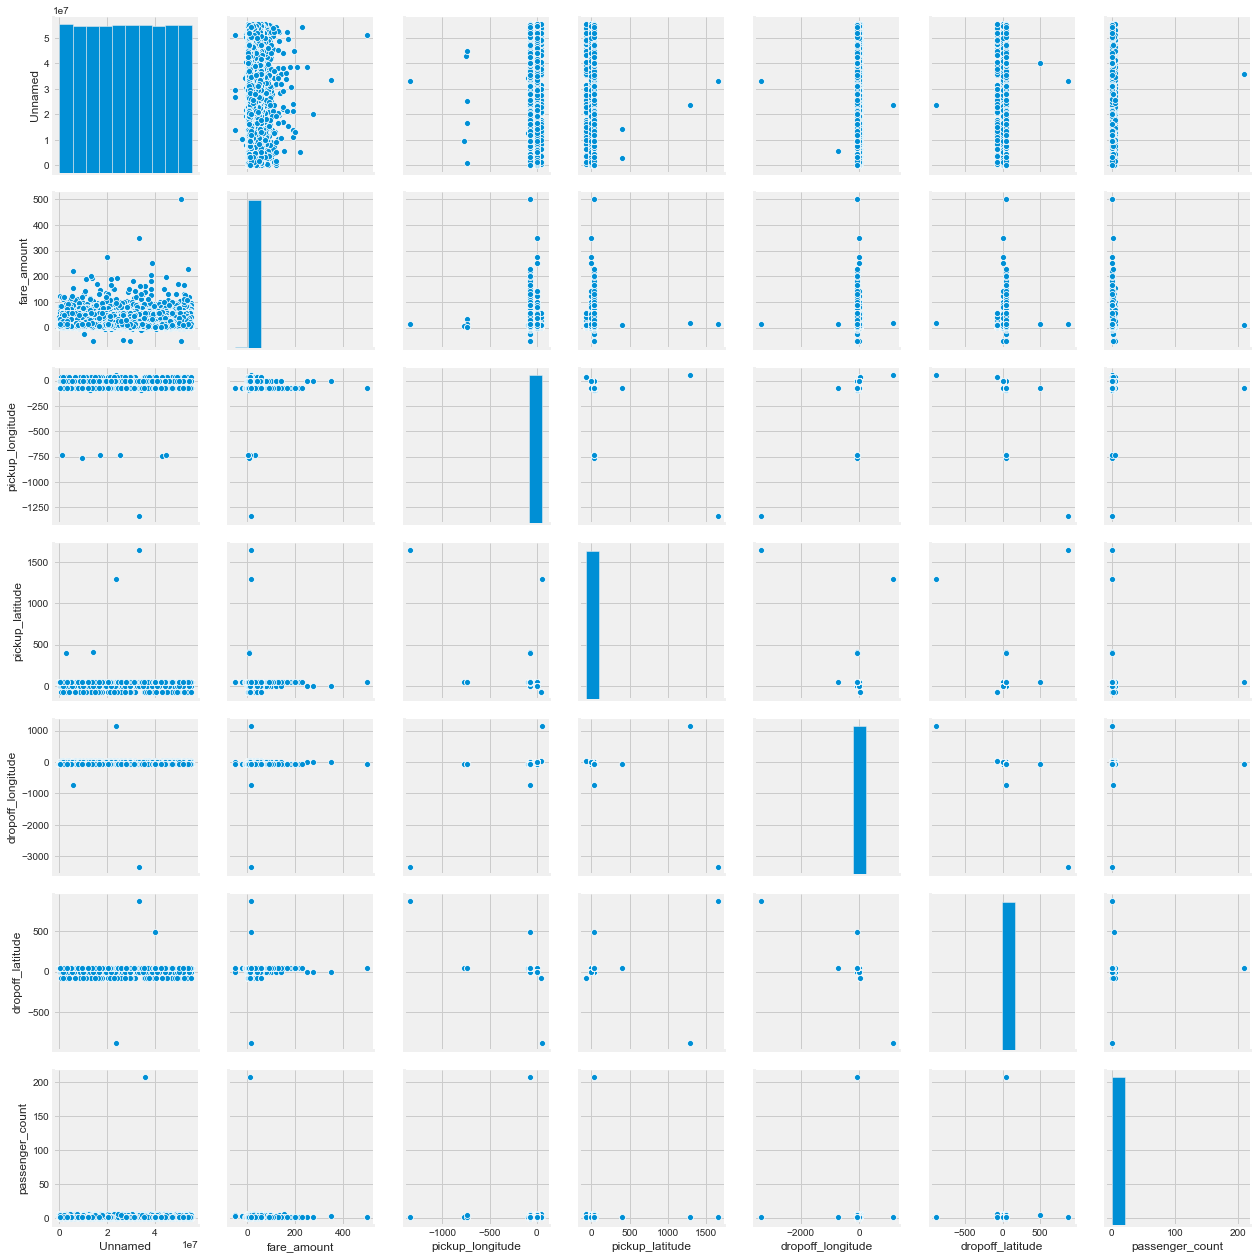

In [295]:
sns.pairplot(data);

## Handling Missing Values

In [296]:
print('Missing values in percentage')
round(100*data.isnull().sum()/len(data),4)

# There are missing values in columns dropoff_longitude, dropoff_latitude
# Percentage of missing values is very less we can drop those rows

Missing values in percentage


Unnamed              0.0000
key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64

In [297]:
# In the dataset there are few zero values, getting the columns with zero values and their count

In [298]:
df = pd.DataFrame((data == 0).sum()).reset_index()
df.columns = ['var', 'count']

In [299]:
df

,var,count
0,Unnamed,0
1,key,0
2,fare_amount,5
3,pickup_datetime,0
4,pickup_longitude,3786
5,pickup_latitude,3782
6,dropoff_longitude,3764
7,dropoff_latitude,3758
8,passenger_count,709


In [300]:
# we cannot consider the zero latitude and logitudes for the model, hence replacing them with "Nan"

In [301]:
data.replace(to_replace=0,value=np.nan,inplace=True)

In [302]:
data.isnull().sum()

Unnamed                 0
key                     0
fare_amount             5
pickup_datetime         0
pickup_longitude     3786
pickup_latitude      3782
dropoff_longitude    3765
dropoff_latitude     3759
passenger_count       709
dtype: int64

In [303]:
print('Missing values in percentage after replacing zeros')
round(100*data.isnull().sum()/len(data),4)

Missing values in percentage after replacing zeros


Unnamed              0.0000
key                  0.0000
fare_amount          0.0025
pickup_datetime      0.0000
pickup_longitude     1.8930
pickup_latitude      1.8910
dropoff_longitude    1.8825
dropoff_latitude     1.8795
passenger_count      0.3545
dtype: float64

In [304]:
# Percentage of missing values is very less, dropping the rows with missing values

In [305]:
cols_nan=['fare_amount','pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count']

In [306]:
for i in cols_nan:
    data.drop(list(data[data[i].isnull()].index),axis=0,inplace=True)

In [307]:
data.isnull().sum()

Unnamed              0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195342 entries, 0 to 199999
Data columns (total 9 columns):
Unnamed              195342 non-null int64
key                  195342 non-null object
fare_amount          195342 non-null float64
pickup_datetime      195342 non-null object
pickup_longitude     195342 non-null float64
pickup_latitude      195342 non-null float64
dropoff_longitude    195342 non-null float64
dropoff_latitude     195342 non-null float64
passenger_count      195342 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 14.9+ MB


## EDA

In [27]:
# categorical columns
data.dtypes[data.dtypes=='object'].index.tolist()

['key', 'pickup_datetime']

In [8]:
# numerical columns
data.dtypes[data.dtypes!='object'].index.tolist()

['Unnamed',
 'fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [28]:
# unique values of categorical columns
data.key.unique().size
data.pickup_datetime.unique().size

# We have many unique value in categorical columns
# Not including them in the model

196629

196629

In [312]:
data.columns

Index(['Unnamed', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

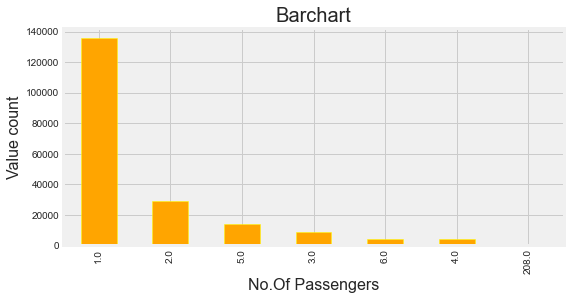

In [315]:
data["passenger_count"].value_counts().plot(kind="bar",figsize=[8,4], edgecolor='yellow', color='Orange')
plt.xlabel('No.Of Passengers', fontsize=16)
plt.ylabel('Value count', fontsize=16)
plt.title('Barchart',fontsize=20)
plt.show();

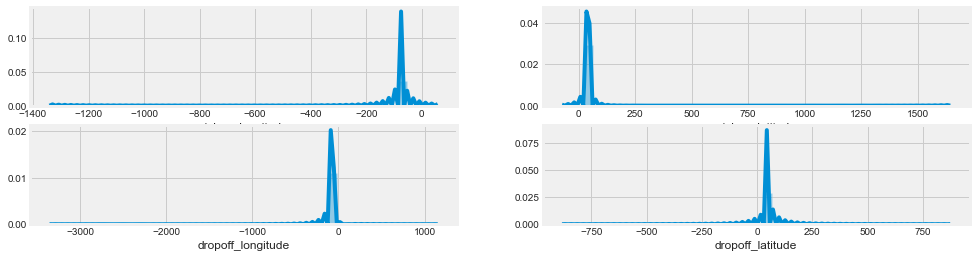

In [324]:
plt.figure(figsize=(15,4))

plt.subplot(2,2,1)
sns.distplot(data.pickup_longitude)

plt.subplot(2,2,2)
sns.distplot(data.pickup_latitude)

plt.subplot(2,2,3)
sns.distplot(data.dropoff_longitude);

plt.subplot(2,2,4)
sns.distplot(data.dropoff_latitude)

plt.show();

# Model Building

In [78]:
# Importing the required libraries the model

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [80]:
data.columns

Index(['Unnamed', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [79]:
feature_cols=['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count']

In [81]:
x=data[feature_cols]
y=data.fare_amount

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

### Model with DecisionTree

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
dt = DecisionTreeRegressor()

In [95]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [96]:
dt_pred=dt.predict(x_test)

In [97]:
r2_score(y_test,dt_pred)

0.6088023942204452

In [98]:
np.sqrt(mean_squared_error(y_test,dt_pred))

6.083365869398486

### Model with Random Forest

In [236]:
from sklearn.ensemble import RandomForestRegressor

In [256]:
rf=RandomForestRegressor(random_state=0)

In [257]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [258]:
y_train_pred = rf.predict(x_train)

y_test_pred = rf.predict(x_test)

In [259]:
r2_score(y_train,y_train_pred)
r2_score(y_test,y_test_pred)

0.9578406499267291

0.7623392783527617

In [260]:
rf.feature_importances_

array([0.31869865, 0.13453158, 0.37888244, 0.15919916, 0.00868817])

In [261]:
f_imp = rf.feature_importances_

In [262]:
np.argsort(rf.feature_importances_)

array([4, 1, 3, 0, 2], dtype=int64)

In [263]:
sorted_idx = np.argsort(rf.feature_importances_)

In [264]:
x_train.columns[sorted_idx]

Index(['passenger_count', 'pickup_latitude', 'dropoff_latitude',
       'pickup_longitude', 'dropoff_longitude'],
      dtype='object')

In [265]:
f_imp[sorted_idx]

array([0.00868817, 0.13453158, 0.15919916, 0.31869865, 0.37888244])

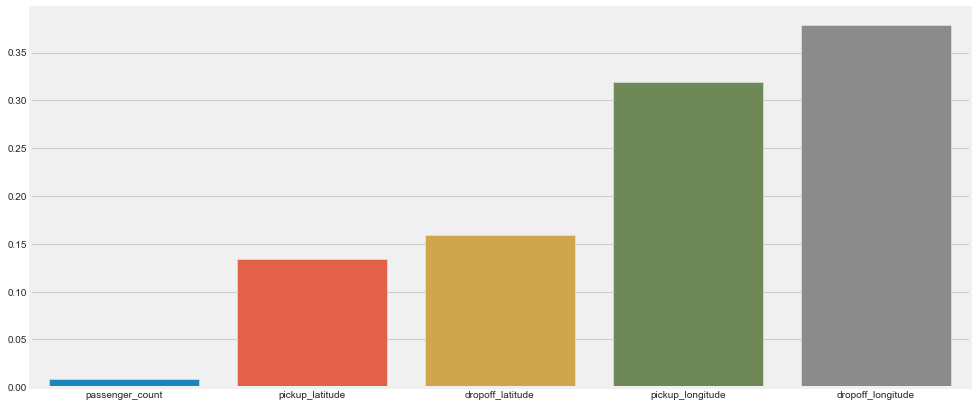

In [266]:
plt.figure(figsize=(15,7))
sns.barplot(x = x_train.columns[sorted_idx], y = f_imp[sorted_idx])
plt.show();

In [267]:
features_selected= ['dropoff_longitude', 'pickup_longitude', 'dropoff_latitude',
       'pickup_latitude']
# Selecting features that are having high importance

In [268]:
xrf=data[features_selected]
yrf=data.fare_amount

In [269]:
xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(xrf,yrf, test_size = 0.3, random_state = 0)

In [270]:
rf1 = RandomForestRegressor(random_state=0)

In [271]:
rf1.fit(xrf_train, yrf_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [272]:
yrf_train_pred1 = rf1.predict(xrf_train)

yrf_test_pred1 = rf1.predict(xrf_test)

In [273]:
r2_score(yrf_train,yrf_train_pred1)
r2_score(yrf_test,yrf_test_pred1)

0.9578446993675813

0.7646486202521627

In [274]:
np.sqrt(mean_squared_error(yrf_test,yrf_test_pred1))

4.718502800292847

In [133]:
test=pd.read_excel(r'C:\Users\Devi Vara Prasad\Desktop\Innomatics\Projects\Uber-Hackathon\sample_test_without_target.xlsx')

In [135]:
test.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'key', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [136]:
test_features=['dropoff_longitude', 'pickup_longitude', 'dropoff_latitude',
       'pickup_latitude']

In [137]:
test[test_features]

,dropoff_longitude,pickup_longitude,dropoff_latitude,pickup_latitude
0,-73.947570,-73.951662,40.756220,40.790710
1,-73.974075,-73.951007,40.763553,40.771508
2,-73.990298,-73.996473,40.756152,40.747930
3,-73.952617,-73.997934,40.727149,40.716890
4,-73.906128,-73.952583,40.711281,40.714039
...,...,...,...,...
49995,-73.986245,-73.993368,40.744542,40.747670
49996,-73.992022,-73.885612,40.731085,40.773122
49997,-73.962546,-73.962469,40.770940,40.770926
49998,-74.000052,-74.012434,40.717883,40.702658


In [138]:
yrf_test_predictions=rf1.predict(test[test_features])

In [139]:
yrf_test_predictions

array([12.23, 10.74,  4.82, ...,  6.6 ,  8.19, 12.92])

In [194]:
df2=pd.DataFrame()
df2['Predicted_Values']=yrf_test_predictions

In [195]:
df2

,Predicted_Values
0,12.230
1,10.740
2,4.820
3,10.060
4,12.000
...,...
49995,6.060
49996,27.776
49997,6.600
49998,8.190


In [196]:
df3=test[test_features]

In [197]:
df4=pd.concat([df3,df2],axis=1)

In [198]:
df4

,dropoff_longitude,pickup_longitude,dropoff_latitude,pickup_latitude,Predicted_Values
0,-73.947570,-73.951662,40.756220,40.790710,12.230
1,-73.974075,-73.951007,40.763553,40.771508,10.740
2,-73.990298,-73.996473,40.756152,40.747930,4.820
3,-73.952617,-73.997934,40.727149,40.716890,10.060
4,-73.906128,-73.952583,40.711281,40.714039,12.000
...,...,...,...,...,...
49995,-73.986245,-73.993368,40.744542,40.747670,6.060
49996,-73.992022,-73.885612,40.731085,40.773122,27.776
49997,-73.962546,-73.962469,40.770940,40.770926,6.600
49998,-74.000052,-74.012434,40.717883,40.702658,8.190


In [151]:
df4.to_csv('file1')

### Hyper-Parameter tuning

In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
pram_grid = {'n_estimators' : [20,50,100],
            'max_features':[1,2,3]}

In [175]:
model = RandomForestRegressor()

In [176]:
grid_results = GridSearchCV(model, pram_grid, cv = 5)

In [177]:
grid_results.fit(xrf_train.values, yrf_train.values)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': [1, 2, 3],
    

In [178]:
grid_results.best_score_

0.7920888445473656

In [179]:
grid_results.best_params_

{'max_features': 2, 'n_estimators': 100}

In [180]:
grid_results.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [325]:
rf2=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [326]:
rf2.fit(xrf_train, yrf_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [327]:
yrf_train_pred2 = rf2.predict(xrf_train)

yrf_test_pred2 = rf2.predict(xrf_test)

In [328]:
r2_score(yrf_train,yrf_train_pred2)
r2_score(yrf_test,yrf_test_pred2)

0.9706786545622735

0.7912607494073837

In [329]:
np.sqrt(mean_squared_error(yrf_test,yrf_test_pred1))

4.718502800292847

In [330]:
yrf_test_predictions2=rf2.predict(test[test_features])

In [331]:
yrf_test_predictions2

array([12.469, 10.276,  4.908, ...,  6.493,  8.568, 11.703])

In [332]:
df2['Predicted_Values2']=yrf_test_predictions2

In [333]:
df2

,Predicted_Values,Predicted_Values2
0,12.230,12.469000
1,10.740,10.276000
2,4.820,4.908000
3,10.060,12.884700
4,12.000,12.069333
...,...,...
49995,6.060,5.420000
49996,27.776,29.038100
49997,6.600,6.493000
49998,8.190,8.568000


In [334]:
df5=pd.concat([df3,df2['Predicted_Values2']],axis=1)

In [335]:
df5

,dropoff_longitude,pickup_longitude,dropoff_latitude,pickup_latitude,Predicted_Values2
0,-73.947570,-73.951662,40.756220,40.790710,12.469000
1,-73.974075,-73.951007,40.763553,40.771508,10.276000
2,-73.990298,-73.996473,40.756152,40.747930,4.908000
3,-73.952617,-73.997934,40.727149,40.716890,12.884700
4,-73.906128,-73.952583,40.711281,40.714039,12.069333
...,...,...,...,...,...
49995,-73.986245,-73.993368,40.744542,40.747670,5.420000
49996,-73.992022,-73.885612,40.731085,40.773122,29.038100
49997,-73.962546,-73.962469,40.770940,40.770926,6.493000
49998,-74.000052,-74.012434,40.717883,40.702658,8.568000


In [336]:
df5.to_csv('file2')

### Model with Ada Boost

In [167]:
from sklearn.ensemble import GradientBoostingRegressor

In [168]:
ada=GradientBoostingRegressor(random_state=0)

In [169]:
ada.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [170]:
yad_train_pred1 = ada.predict(x_train)

yad_test_pred1 = ada.predict(x_test)

In [171]:
r2_score(y_train,yad_train_pred1)
r2_score(y_test,yad_test_pred1)

0.756381326887718

0.7350536330945346

In [172]:
np.sqrt(mean_squared_error(yrf_test,yrf_test_pred1))

4.678679583886928

**_Model with RandomForest is giving the best r2_score_**

In [338]:
import xgboost as xgb # pip install xgboost
from xgboost.sklearn import XGBRegressor

In [339]:
XGB1=XGBRegressor(random_state=0)

In [340]:
XGB1.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [342]:
yad_train_pred2 = XGB1.predict(x_train)

yad_test_pred2 = XGB1.predict(x_test)

In [343]:
r2_score(y_train,yad_train_pred2)
r2_score(y_test,yad_test_pred2)

0.8696497179164301

0.7801685100907884

In [344]:
np.sqrt(mean_squared_error(y_test,yrf_test_pred2))

4.443732448629403